In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

def read_data(file_name):
    file1 = open(f'{file_name}', 'r')
    with file1 as f:
        data = f.readlines()
        print(data) 
        header = [x.strip() for x in data if x[0] == '#']
        print(header)
        data = [x.strip() for x in data if x[0] != '#']
        print(data)
        data = [x.split() for x in data]
        print(data)
        time = [float(x[0]) for x in data]  
        position = [float(x[1]) for x in data]
        print(time)
        print(position)
        t = np.array(time)
        s = np.array(position)
        n = len(t)
        
    return t ,s , n 

t, s ,n = read_data('./Asssignment6_Q1.txt')

['# Time (seconds) and Position (meters)\n', '# Time    Position\n', '0.0      0.0\n', '1.0      2.5\n', '2.0      9.8\n', '3.0      22.3\n', '4.0      40.0\n', '5.0      62.5\n']
['# Time (seconds) and Position (meters)', '# Time    Position']
['0.0      0.0', '1.0      2.5', '2.0      9.8', '3.0      22.3', '4.0      40.0', '5.0      62.5']
[['0.0', '0.0'], ['1.0', '2.5'], ['2.0', '9.8'], ['3.0', '22.3'], ['4.0', '40.0'], ['5.0', '62.5']]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 2.5, 9.8, 22.3, 40.0, 62.5]


In [2]:
df = pd.DataFrame({'time': t, 'position': s})
print("Extracted Data")
df

Extracted Data


,time,position
0,0.0,0.0
1,1.0,2.5
2,2.0,9.8
3,3.0,22.3
4,4.0,40.0
5,5.0,62.5


In [3]:
def finite_difference_velocity(t, s):
    v = np.zeros(n)
    
    # Central difference for interior points
    for i in range(1, n-1):
        v[i] = (s[i+1] - s[i-1]) / (t[i+1] - t[i-1])
    
    # Forward difference for the first point
    v[0] = (s[1] - s[0]) / (t[1] - t[0])
    
    # Backward difference for the last point
    v[-1] = (s[-1] - s[-2]) / (t[-1] - t[-2])
    
    return v

def trapezoidal_integration(t, v):
    h = np.diff(t)
    integral = 0.5 * np.sum(h * (v[:-1] + v[1:]))
    return integral


v = finite_difference_velocity(t, s)


distance_traveled = trapezoidal_integration(t, v)


print("Velocity at each time step:", v)
assert distance_traveled == s[-1]
print("Total distance traveled by the train:", distance_traveled)

Velocity at each time step: [ 2.5  4.9  9.9 15.1 20.1 22.5]
Total distance traveled by the train: 62.5


In [4]:
df_2 = pd.DataFrame({'time': t, 'velocity': v})
df_2

,time,velocity
0,0.0,2.5
1,1.0,4.9
2,2.0,9.9
3,3.0,15.1
4,4.0,20.1
5,5.0,22.5


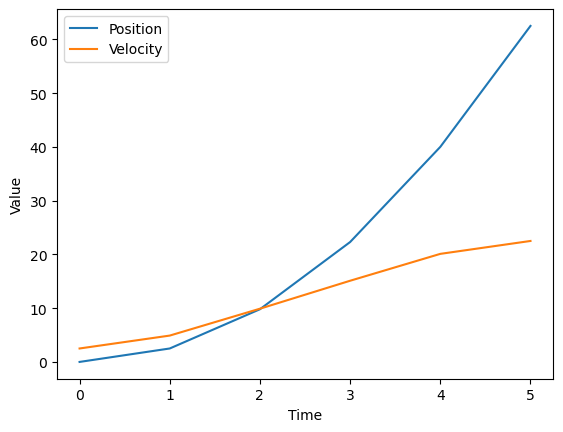

In [5]:
plt.plot(t, s, label='Position')
plt.plot(t, v, label='Velocity')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
